# Training and Running of new GLM model
This Notebook is for training and running the our new GLM model that includes (for now only) deletion tokens

## Adding necessary imports
You can run this block to import necessary classes and functions

Checking for existing trained model in ./dna_bert_final_baseline
Loading tokenizer...
Tokenizer loaded
Loading dataset...
Dataset loaded
Loading model...
Model loaded successfully!
Model type: Baseline (no deletions)
Trained for 500 epochs
Final validation loss: 1.0593
Training curves saved to ./dna_bert_final_baseline/training_curves_replotted.png


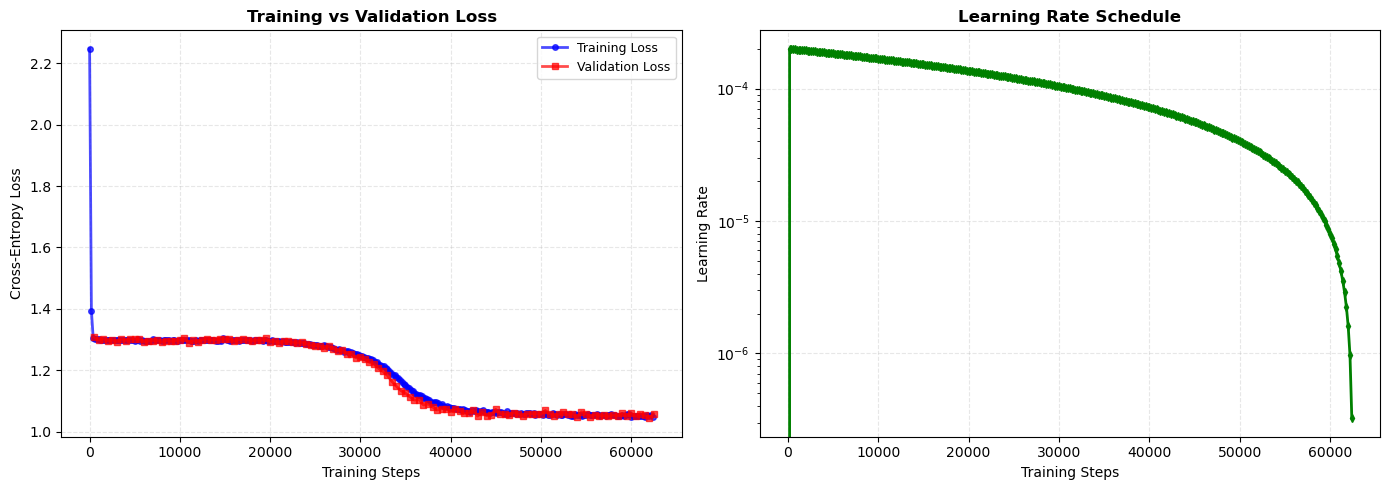


Training Summary:
Final training loss: 1.0492
Final validation loss: 1.0593
Best validation loss: 1.0441


In [1]:
from fundemental_classes.model_related.glm_model import GLMModel

# You can change force_retrain to True if you want to always retrain your model everytime
                    
                          
baseline_model = GLMModel("./dna_bert_final_baseline",
                           "debug_baselinemodel/new_augumented_sequence_size5000_length100_deletions0_nodeletionseq0.05.fasta",
                           force_retrain=False, include_deletions=False)

# Set the default Model to train and use for visualization
model = baseline_model
use_deletions = False


## Training
We use `Bert` model to create the embeddings and train it using masking to get nicely trained model. If you want to change the size of training data, please look into `simulated_sequences` directory. \\\

Below is given two subheaders: *Baseline Model Training & Deletion Model Training*. Each of them can be run seperately if you are looking for seperate results or loading.
*important:* Training is not necessary if you already have a trained model. You can load it using the `GLMModel`.

### Baseline Model Training

In [ ]:
baseline_model.train(epochs=500, batch_size=32, lr=2e-4)

Dataset split: 4000 training, 1000 validation
Model type: Baseline (no deletions)
Vocabulary: ['A', 'C', 'G', 'T']


Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
***** Running training *****
  Num examples = 4,000
  Num Epochs = 500
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 62,500
  Number of trainable parameters = 8,619,785


Starting Training


Step,Training Loss,Validation Loss
500,1.304700,1.307721
1000,1.300500,1.297717
1500,1.299400,1.302802
2000,1.297600,1.296414
2500,1.300400,1.298512
3000,1.300100,1.293003
3500,1.298400,1.302138
4000,1.298600,1.297151
4500,1.299000,1.302269
5000,1.296700,1.301869



***** Running Evaluation *****
  Num examples = 1000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final_baseline/checkpoint-500
Configuration saved in ./dna_bert_final_baseline/checkpoint-500/config.json
Model weights saved in ./dna_bert_final_baseline/checkpoint-500/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_bert_final_baseline/checkpoint-500/tokenizer_config.json
Special tokens file saved in ./dna_bert_final_baseline/checkpoint-500/special_tokens_map.json

***** Running Evaluation *****
  Num examples = 1000
  Batch size = 32
Saving model checkpoint to ./dna_bert_final_baseline/checkpoint-1000
Configuration saved in ./dna_bert_final_baseline/checkpoint-1000/config.json
Model weights saved in ./dna_bert_final_baseline/checkpoint-1000/model.safetensors
Saving Trainer.data_collator.tokenizer by default as Trainer.processing_class is `None`
tokenizer config file saved in ./dna_

### Deletion Model Training

## Visualization | Sequence reconstruction probabilities
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\
*Important:* For now we pass our test cases by hand. However in the future we will generate good inputs to test how well the model functions

### OLD SEQUENCE PLOTTER

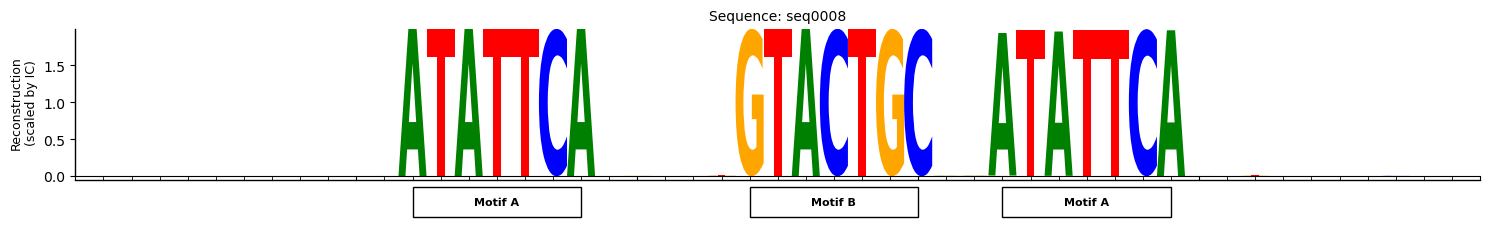

In [10]:
from fundemental_classes.visualization.sequence_plotter import plot

#normal reconstruction
header = "seq0008|label=both|posAmotif=12,33|posBmotif=24|gaplength=5|deletions=0"
sequence = "TTGGCCTGGTGCATATTCAGTTACGTACTGCATATATTCAAAGTGTCTGC"

prob_matrix = baseline_model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6, with_deletions=False)

### NEW SEQUENCE PLOTTER

/data/ceph/hdd/project/node_09/sys_gen_students/2025_2026/p06_better_indel_glm/Sysgen-GLM-for-Indels/fundemental_classes/visualization/sequence_plotter_new.py:92: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


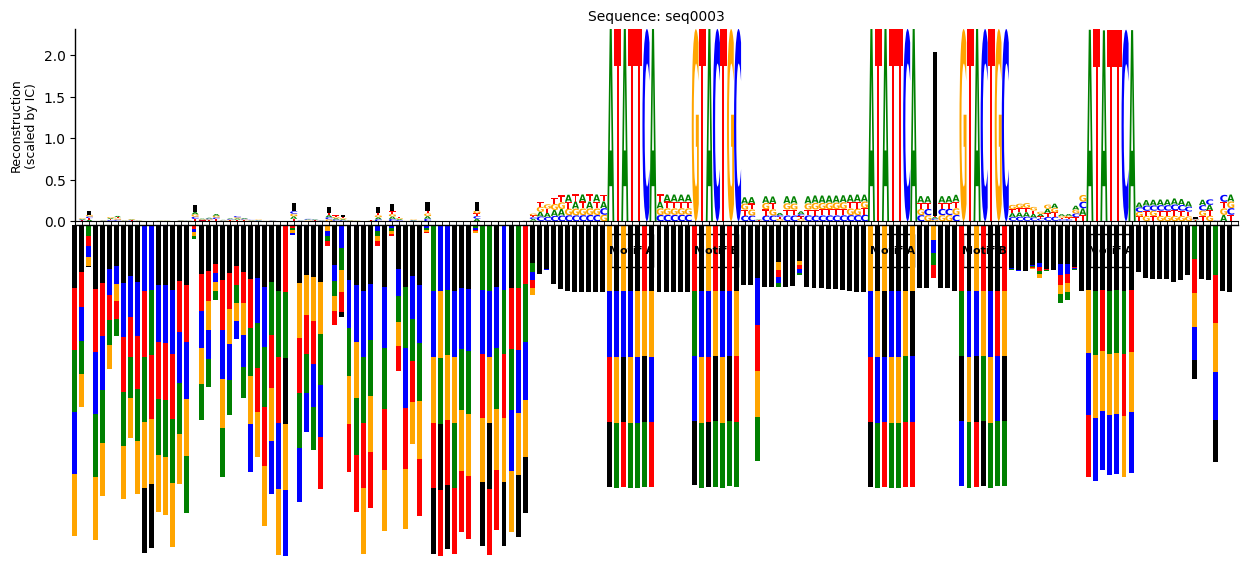

In [9]:
from fundemental_classes.visualization.sequence_plotter_new import plot

#normal reconstruction - indel model
header = "seq0003|label=both|posAmotif=76,113,144|posBmotif=88,126|gaplength=5|deletions=15"
sequence = "CT-TAGCGCATCTGCCA-CCATCGACGTTAC-TGGC-G-CAGA-A-ACAA-CAGCAC-TACTCAGACCTGCGGTGTATATTCACCATGGTACTGCGA-TT-GA-AGTAAACCCATATTCAAT-TGAGTACTGCGCTGTGAACCAATATTCATAGCGGGA-CT-GG"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6, with_deletions=use_deletions)

ValueError: invalid literal for int() with base 10: 'None'

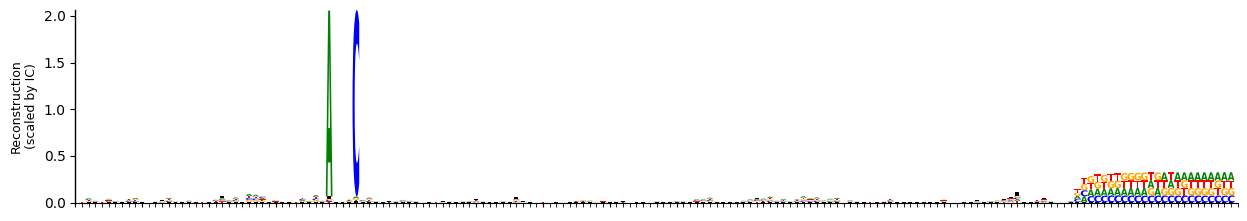

In [ ]:
#replace with letter (SNP variation)
header = "seq0003|label=both|posAmotif=76,113,144|posBmotif=88,126|gaplength=5|deletions=15"
sequence = "CT-TAGCGCATCTGCCA-CCATCGACGTTAC-TGGC-G-CAGA-A-ACAA-CAGCAC-TACTCAGACCTGCGGTGTATATTCACCATGGTACTGCGA-TT-GA-AGTAAACCCATATTCAAT-TGAGTACTGCGCTGTGAACCAATATTCATAGCGGGA-CT-GG"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6, with_deletions=use_deletions)

In [ ]:
#replace with deletion token (InDel variation)
header = "seq0030|label=both|posAmotif=13|posBmotif=140|gaplength=100|deletions=27"
sequence = "A-TTGGAGC-CCAATATTCA--CGCCTC-A-CC-A-ACTCG-AGGTTC--GGAAT-TCCCC-T-TCCCA-CCTTG-AGTC--AATTGGGG-TCCTGCTGA-TACAATGG--CT-GCTGTGGACGACTCCTATGATGGGCTGTACTGC--GA-G-GCTTCGGTAGAAT-CGTTATGCC"

prob_matrix = model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6, with_deletions=use_deletions)

In [2]:
from fundemental_classes.visualization.sequence_plotter_new import plot

#normal reconstruction - baseline
header = "seq0003|label=both|posAmotif=67,101,131|posBmotif=79,113|gaplength=5|deletions=0"
sequence = "CTTAGCGCATCTGCCACCATCGACGTTACTGGCGCAGAAACAACAGCACTACTCAGACCTGCGGTGTATATTCACCATGGTACTGCGATTGAAGTAAACCCATATTCAATTGAGTACTGCGCTGTGAACCAATATTCATAGCGGGACTGG"
prob_matrix = baseline_model.get_full_reconstruction_probs(sequence)

plot(header, sequence, prob_matrix, motif_length=6, with_deletions=False)

/data/ceph/hdd/project/node_09/sys_gen_students/2025_2026/p06_better_indel_glm/Sysgen-GLM-for-Indels/fundemental_classes/visualization/sequence_plotter_new.py:92: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


ValueError: Image size of 1265x159533 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1500x250 with 1 Axes>

## Visualization | Dependency Map
This block is used for getting already trained model, passing the sequence to test how well the model performs.
\\\\\

In [10]:
from fundemental_classes.visualization.heat_map_plotter import DependencyMapGenerator
import numpy as np
import plotly.graph_objects as go
from fundemental_classes.visualization.sequence_logo import SequenceLogo


# a function for creating the heatmap with overlayed logo with input sequence, type of dependency and model
def depencency_map_with_logo(model, sequence, type='snp'):
    dep_gen = DependencyMapGenerator(model, type=type, use_deletions=use_deletions)
    prob_matrix = model.get_full_reconstruction_probs(sequence)
    dep_map = dep_gen.analyze(sequence, show_plot=False)
    L = dep_map.shape[0]
    reconstruction_logo = SequenceLogo.from_reconstruction(prob_matrix)
    fig = go.Figure()
    fig.add_trace(
        go.Heatmap(
            z=dep_map,
            x=np.arange(L),
            y=np.arange(L),
            colorscale="RdBu_r",
        )
    )
    # if the xaxes and yaxes are shown
    fig.update_xaxes(visible=True, scaleanchor="y", constrain="domain")
    fig.update_yaxes(visible=True, autorange="reversed", scaleanchor="x", constrain="domain")
    # Overlay logo at the top 
    fig.add_layout_image(
        source=reconstruction_logo.to_svg(data_url=True),
        xref="x",
        yref="y domain",
        x=-0.5,  # align left edge of first column
        y=1.0,  # top of heatmap domain
        sizex=L,  # span exactly L columns
        sizey=0.10,  # height in domain units (tune)
        xanchor="left",
        yanchor="bottom",
        sizing="stretch",
    )
    fig.update_layout(
        width=900,
        height=900,
        margin=dict(l=20, r=20, t=100, b=20),
    )
    fig.show()


In [15]:
#dependency map for snp 
header = "seq0003|label=both|posAmotif=76,113,144|posBmotif=88,126|gaplength=5|deletions=15"
sequence = "CT-TAGCGCATCTGCCA-CCATCGACGTTAC-TGGC-G-CAGA-A-ACAA-CAGCAC-TACTCAGACCTGCGGTGTATATTCACCATGGTACTGCGA-TT-GA-AGTAAACCCATATTCAAT-TGAGTACTGCGCTGTGAACCAATATTCATAGCGGGA-CT-GG"

dep_map = depencency_map_with_logo(model, sequence, type='snp')

Computing dependency map...


Map: 100%|██████████| 451/451 [00:00<00:00, 3887.99 examples/s]


In [16]:
#dependency map for indels - reconstruction

header = "seq0003|label=both|posAmotif=76,113,144|posBmotif=88,126|gaplength=5|deletions=15"
sequence = "CT-TAGCGCATCTGCCA-CCATCGACGTTAC-TGGC-G-CAGA-A-ACAA-CAGCAC-TACTCAGACCTGCGGTGTATATTCACCATGGTACTGCGA-TT-GA-AGTAAACCCATATTCAAT-TGAGTACTGCGCTGTGAACCAATATTCATAGCGGGA-CT-GG"

dep_map = depencency_map_with_logo(model, sequence, type='indel')

Computing dependency map...


Map: 100%|██████████| 151/151 [00:00<00:00, 4305.65 examples/s]


In [17]:
#dependency map for removing nucleotide

header = "seq0003|label=both|posAmotif=76,113,144|posBmotif=88,126|gaplength=5|deletions=15"
sequence = "CT-TAGCGCATCTGCCA-CCATCGACGTTAC-TGGC-G-CAGA-A-ACAA-CAGCAC-TACTCAGACCTGCGGTGTATATTCACCATGGTACTGCGA-TT-GA-AGTAAACCCATATTCAAT-TGAGTACTGCGCTGTGAACCAATATTCATAGCGGGA-CT-GG"

dep_map = depencency_map_with_logo(model, sequence, type='removal')

Computing dependency map...


Map: 100%|██████████| 1/1 [00:00<00:00, 277.81 examples/s]

aligned deletion pos: 0 shape: (165, 5)
